## Problem 1: The Curse of Dimensionality; or why self driving cars are hard.

### 1a) Sampling in low dimensions

Generate a sample of 100 randomly distributed points inside a 2D square. 


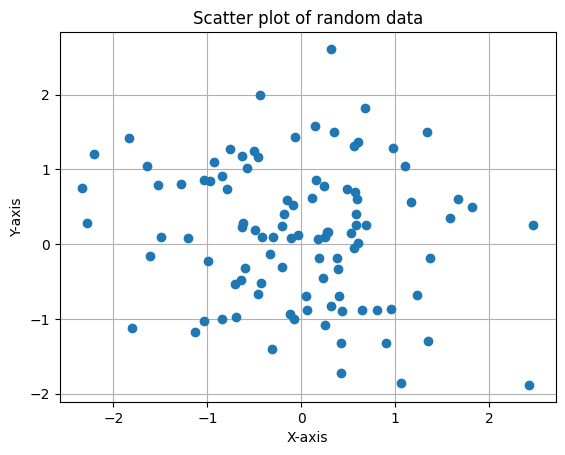

In [14]:
import numpy as np
import matplotlib.pyplot as plt


data=np.random.randn(100, 2)

plt.plot(data[:, 0], data[:, 1], 'o')
plt.title('Scatter plot of random data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)


### 1b) Distances in low dimensions

Calculate the pairwise distances between all of the points, in d-dimensions, for two points x_i and y_i, this quantity is

$$ |x - y| = \sqrt{\Sigma (x_i - y_i)^2} $$

In [11]:
distances = []
#compute distances beween all pairs of points (without counting double)
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        distance = np.sqrt((data[i, 0] - data[j, 0]) ** 2 + (data[i, 1] - data[j, 1]) ** 2)
        distances.append(distance)

### 1c) Distribution of distances in low dimensions 

Plot the distribution of these distances. Do you notice anything interesting? Is a "special value" picked out?

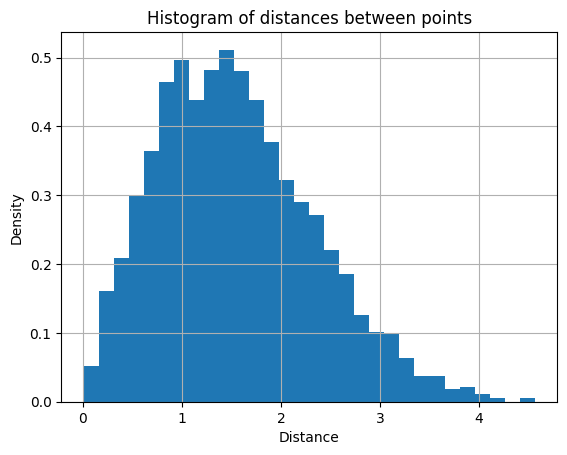

In [12]:
plt.figure()
plt.hist(distances, bins=30, density=True)
plt.title('Histogram of distances between points')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Special value around 1.5

### 1d) Extending to d-dimensions

Now, let's consider the difference between picking a point located in a d-dimensional sphere vs in a d-dimensional cube. To do this, calculate and plot the the difference between the volume of a cube centered at the origin and going from [-1, 1] and the volume of a unit-radius sphere as the dimension d of the space increases. Possibly helpful formula: 

$$ Sphere: V_d = \frac{\pi^{d/2}}{\frac{d}{2} \Gamma(\frac{d}{2})} R^d$$ 

where R is the radius of the sphere.

$$ Cube: V_d = L^d $$

and L is the length of a side.

Dimension 1:
Volume of cube: 2
Volume of sphere: 2.0
Ratio: 1.0
Dimension 2:
Volume of cube: 4
Volume of sphere: 3.141592653589793
Ratio: 0.7853981633974483
Dimension 3:
Volume of cube: 8
Volume of sphere: 4.188790204786391
Ratio: 0.5235987755982989
Dimension 4:
Volume of cube: 16
Volume of sphere: 4.934802200544679
Ratio: 0.30842513753404244
Dimension 5:
Volume of cube: 32
Volume of sphere: 5.263789013914325
Ratio: 0.16449340668482265
Dimension 6:
Volume of cube: 64
Volume of sphere: 5.167712780049969
Ratio: 0.08074551218828077
Dimension 7:
Volume of cube: 128
Volume of sphere: 4.724765970331401
Ratio: 0.03691223414321407
Dimension 8:
Volume of cube: 256
Volume of sphere: 4.058712126416768
Ratio: 0.0158543442438155
Dimension 9:
Volume of cube: 512
Volume of sphere: 3.2985089027387056
Ratio: 0.006442400200661534
Dimension 10:
Volume of cube: 1024
Volume of sphere: 2.550164039877345
Ratio: 0.00249039457019272
Dimension 11:
Volume of cube: 2048
Volume of sphere: 1.8841038793898999
Ratio:

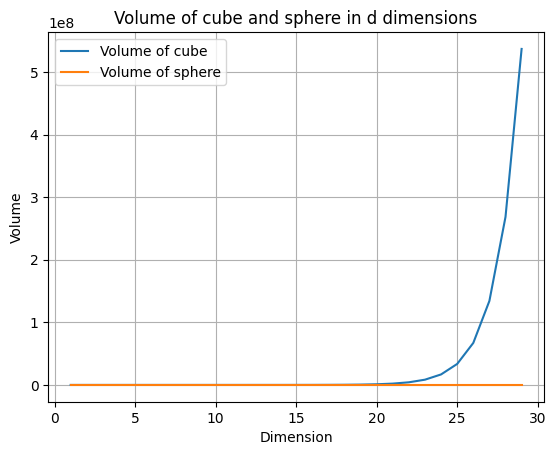

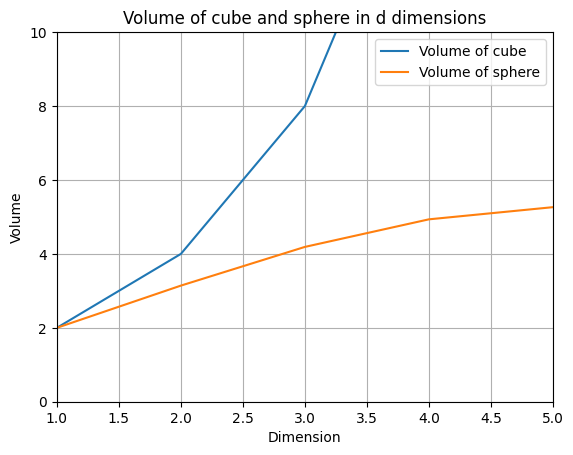

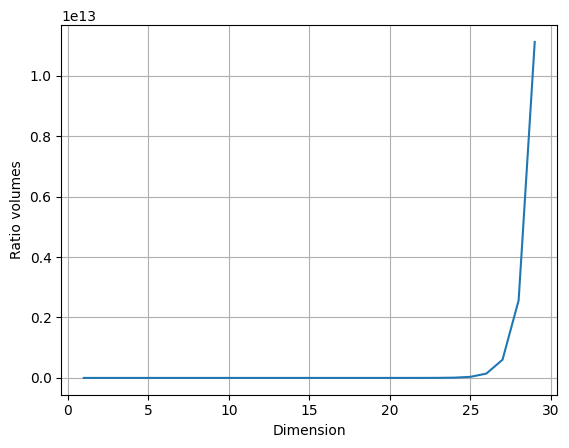

In [22]:
import math

def volume_cub(L,d):
    """
    Compute the volume of a d-dimensional cube with side length L.
    """
    return L ** d

def volume_sphere(R,d):
    """
    Compute the volume of a d-dimensional sphere with radius R.
    """
    return (np.pi ** (d / 2) * R ** d) / (d/2 * math.gamma(d / 2 ))


volume_cubes = []
volume_spheres = []
ds=range(1,30)
for d in range(1,30):
    L = 2
    R = 1
    print(f"Dimension {d}:")
    print(f"Volume of cube: {volume_cub(L, d)}")
    print(f"Volume of sphere: {volume_sphere(R, d)}")
    print(f"Ratio: {volume_sphere(R, d) / volume_cub(L, d)}")
    volume_cubes.append(volume_cub(L, d))
    volume_spheres.append(volume_sphere(R, d))

plt.figure()
plt.plot(ds, volume_cubes, label='Volume of cube')
plt.plot(ds, volume_spheres, label='Volume of sphere')
plt.title('Volume of cube and sphere in d dimensions')
plt.xlabel('Dimension')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
plt.plot(ds, volume_cubes, label='Volume of cube')
plt.plot(ds, volume_spheres, label='Volume of sphere')
plt.title('Volume of cube and sphere in d dimensions')
plt.xlabel('Dimension')
plt.ylabel('Volume')
plt.xlim(1,5)
plt.ylim(0, 10)
plt.legend()
plt.grid(True)
plt.show()

volume_cubes = np.array(volume_cubes)
volume_spheres = np.array(volume_spheres)
plt.figure()
plt.plot(ds, volume_cubes/volume_spheres, label='Ratio of volumes')
plt.xlabel('Dimension')
plt.ylabel('Ratio volumes')
plt.grid(True)
plt.show()


    

### 1e) Sampling in d-dimensions

Now, consider the problem of sampling in high-dimensions. If we use a uniform prior on every parameter, our expectation is that we will well sample the parameter space simply by picking in a "uniform way". Calculate the ratio of volume contained in an annulus between $R$ and $R - \epsilon$ for d = 1-20 and plot this. Interpret your result in terms of a sampling problem. Are uniform priors a good choice in higher dimensions? Why or why not?

Text(0.5, 0, 'dimensions')

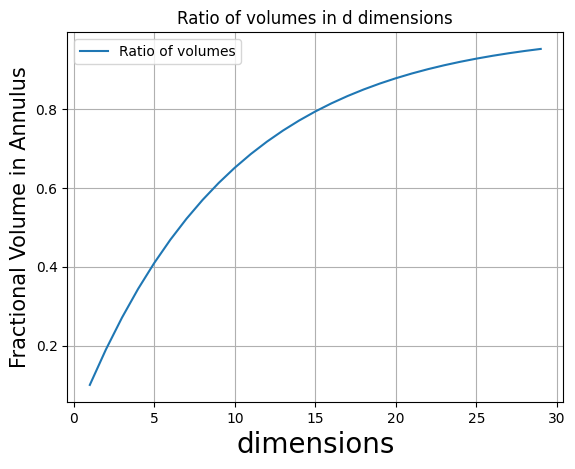

In [27]:
# after some pen and paper math, it becomes clear that this ratio is simply (1-\epsilon)^d
def ratio(d, epsilon):
    return (1 - epsilon) ** d
dimensions = np.arange(1, 30)

ratio_list = []

for d in dimensions: 
    ratio_list.append(ratio(d, 0.1))
plt.figure()
plt.plot(dimensions, 1-np.array(ratio_list), label='Ratio of volumes')
plt.title('Ratio of volumes in d dimensions')
plt.grid(True)
plt.legend()
    
# you fill 
plt.ylabel('Fractional Volume in Annulus', fontsize = 15)
plt.xlabel('dimensions', fontsize = 20)
